In [16]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pickle
import zipfile
import gdown
import time

print("\n Imported All Libraries !")

In [12]:
# Change output path to current dir
output_path = "data.zip"  # no leading slash!

# Create dataset directory in current folder
extract_dir = "data"  # also no leading slash

# Download dataset
gdown.download(f"https://drive.google.com/uc?id={FILE_ID}", output_path, quiet=False)
print("\n Downloaded Zip File from GDrive")

# Extract dataset
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print("\n Extracted zip into 'data' ")

# Clean up
os.remove(output_path)

# Update base path
DATASET_BASE = os.path.join(extract_dir, "data")

TRAIN_PATH = os.path.join(DATASET_BASE, 'train')
VAL_PATH = os.path.join(DATASET_BASE, 'val')
TEST_PATH = os.path.join(DATASET_BASE, 'test')

print(f"Train Path : {TRAIN_PATH}")
print(f"Valid Path : {VAL_PATH}")
print(f"Test Path : {TEST_PATH}")

print("\n Dataset Folders Created Succesfully !!")

Downloading...
From (original): https://drive.google.com/uc?id=1Qfg4LrIX6rBe9nkGutdqGJwBiHsBUQA9
From (redirected): https://drive.google.com/uc?id=1Qfg4LrIX6rBe9nkGutdqGJwBiHsBUQA9&confirm=t&uuid=fe02e2b5-6b1d-4a61-8d60-d67ebf7638b1
To: C:\Users\aswin\Documents\Labmentix\4. Fish Image Classification\data.zip
100%|██████████████████████████████████████████████| 271M/271M [00:03<00:00, 74.0MB/s]


Train Path : data\data\train
Valid Path : data\data\val
Test Path : data\data\test


In [10]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Create directories for saving models
os.makedirs('/data/models', exist_ok=True)

print("\n Generating Data for Models to be trained on")

# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    VAL_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get class information
NUM_CLASSES = len(train_generator.class_indices)
CLASS_NAMES = list(train_generator.class_indices.keys())

# Clean up class names for better display
CLEAN_CLASS_NAMES = []
for name in CLASS_NAMES:
    clean_name = name.replace('animal_fish_', '').replace('fish_sea_food_', '').replace('_', ' ').title()
    CLEAN_CLASS_NAMES.append(clean_name)

print(f"\n📊 Dataset Info:")
print(f"Number of classes: {NUM_CLASSES}")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")

print(f"\n🏷️ Fish Classes:")
for i, (orig, clean) in enumerate(zip(CLASS_NAMES, CLEAN_CLASS_NAMES), 1):
    print(f"{i:2d}. {clean} ({orig})")

# Save class names
with open('/data/models/class_names.pkl', 'wb') as f:
    pickle.dump(CLEAN_CLASS_NAMES, f)

with open('/data/models/original_class_names.pkl', 'wb') as f:
    pickle.dump(CLASS_NAMES, f)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.

📊 Dataset Info:
Number of classes: 11
Training samples: 6225
Validation samples: 1092
Test samples: 3187

🏷️ Fish Classes:
 1. Animal Fish (animal fish)
 2. Animal Fish Bass (animal fish bass)
 3. Fish Sea Food Black Sea Sprat (fish sea_food black_sea_sprat)
 4. Fish Sea Food Gilt Head Bream (fish sea_food gilt_head_bream)
 5. Fish Sea Food Hourse Mackerel (fish sea_food hourse_mackerel)
 6. Fish Sea Food Red Mullet (fish sea_food red_mullet)
 7. Fish Sea Food Red Sea Bream (fish sea_food red_sea_bream)
 8. Fish Sea Food Sea Bass (fish sea_food sea_bass)
 9. Fish Sea Food Shrimp (fish sea_food shrimp)
10. Fish Sea Food Striped Red Mullet (fish sea_food striped_red_mullet)
11. Fish Sea Food Trout (fish sea_food trout)



🚀 Starting Model Training...

🧠 TRAINING: CNN
📊 Model Parameters: 312,523

🚀 Training CNN...


C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1948 - loss: 2.2265

195/195 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.1950 - loss: 2.2259 - val_accuracy: 0.3654 - val_loss: 1.8198 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3367 - loss: 1.8074

195/195 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.3369 - loss: 1.8067 - val_accuracy: 0.4020 - val_loss: 1.4574 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4968 - loss: 1.3826

195/195 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.4968 - loss: 1.3824 - val_accuracy: 0.5760 - val_loss: 1.1508 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.5706 - loss: 1.1887

195/195 ━━━━━━━━━━━━━━━━━━━━ 177s 898ms/step - accuracy: 0.5708 - loss: 1.1883 - val_accuracy: 0.6905 - val_loss: 0.9289 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6499 - loss: 0.9739

195/195 ━━━━━━━━━━━━━━━━━━━━ 112s 572ms/step - accuracy: 0.6500 - loss: 0.9736 - val_accuracy: 0.7756 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 114s 583ms/step - accuracy: 0.6965 - loss: 0.8626 - val_accuracy: 0.6969 - val_loss: 0.7984 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 564ms/step - accuracy: 0.7339 - loss: 0.7156

195/195 ━━━━━━━━━━━━━━━━━━━━ 115s 589ms/step - accuracy: 0.7339 - loss: 0.7156 - val_accuracy: 0.7967 - val_loss: 0.5940 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.7608 - loss: 0.6715

195/195 ━━━━━━━━━━━━━━━━━━━━ 116s 596ms/step - accuracy: 0.7608 - loss: 0.6715 - val_accuracy: 0.8819 - val_loss: 0.4152 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 119s 610ms/step - accuracy: 0.7788 - loss: 0.6211 - val_accuracy: 0.8819 - val_loss: 0.3840 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8060 - loss: 0.5592

195/195 ━━━━━━━━━━━━━━━━━━━━ 123s 629ms/step - accuracy: 0.8060 - loss: 0.5591 - val_accuracy: 0.9066 - val_loss: 0.3140 - learning_rate: 0.0010
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step


C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

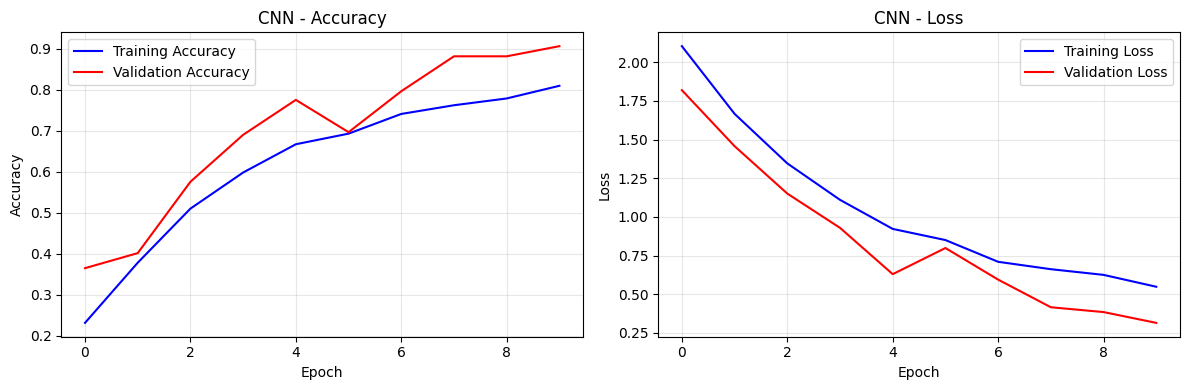


📈 CNN Results:
   Validation Accuracy: 0.9066
   Test Accuracy: 0.8974
   Test Loss: 0.3287

🧠 TRAINING: VGG16
📊 Model Parameters: 14,781,771

🚀 Training VGG16...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3032 - loss: 2.0156

195/195 ━━━━━━━━━━━━━━━━━━━━ 984s 5s/step - accuracy: 0.3038 - loss: 2.0141 - val_accuracy: 0.7024 - val_loss: 1.1545 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6311 - loss: 1.1789

195/195 ━━━━━━━━━━━━━━━━━━━━ 2173s 11s/step - accuracy: 0.6312 - loss: 1.1785 - val_accuracy: 0.8013 - val_loss: 0.7626 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7157 - loss: 0.8929

195/195 ━━━━━━━━━━━━━━━━━━━━ 2102s 11s/step - accuracy: 0.7157 - loss: 0.8927 - val_accuracy: 0.8645 - val_loss: 0.5456 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1797s 9s/step - accuracy: 0.7756 - loss: 0.7125 - val_accuracy: 0.8590 - val_loss: 0.4980 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7834 - loss: 0.6505

195/195 ━━━━━━━━━━━━━━━━━━━━ 753s 4s/step - accuracy: 0.7835 - loss: 0.6504 - val_accuracy: 0.8910 - val_loss: 0.4028 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8121 - loss: 0.5642

195/195 ━━━━━━━━━━━━━━━━━━━━ 877s 4s/step - accuracy: 0.8121 - loss: 0.5642 - val_accuracy: 0.9158 - val_loss: 0.3200 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8248 - loss: 0.5388

195/195 ━━━━━━━━━━━━━━━━━━━━ 857s 4s/step - accuracy: 0.8248 - loss: 0.5388 - val_accuracy: 0.9212 - val_loss: 0.2930 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8455 - loss: 0.4753

195/195 ━━━━━━━━━━━━━━━━━━━━ 767s 4s/step - accuracy: 0.8455 - loss: 0.4753 - val_accuracy: 0.9304 - val_loss: 0.2757 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 958s 5s/step - accuracy: 0.8404 - loss: 0.4597 - val_accuracy: 0.9203 - val_loss: 0.2620 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1100s 6s/step - accuracy: 0.8530 - loss: 0.4431 - val_accuracy: 0.9286 - val_loss: 0.2517 - learning_rate: 0.0010
100/100 ━━━━━━━━━━━━━━━━━━━━ 420s 4s/step


C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

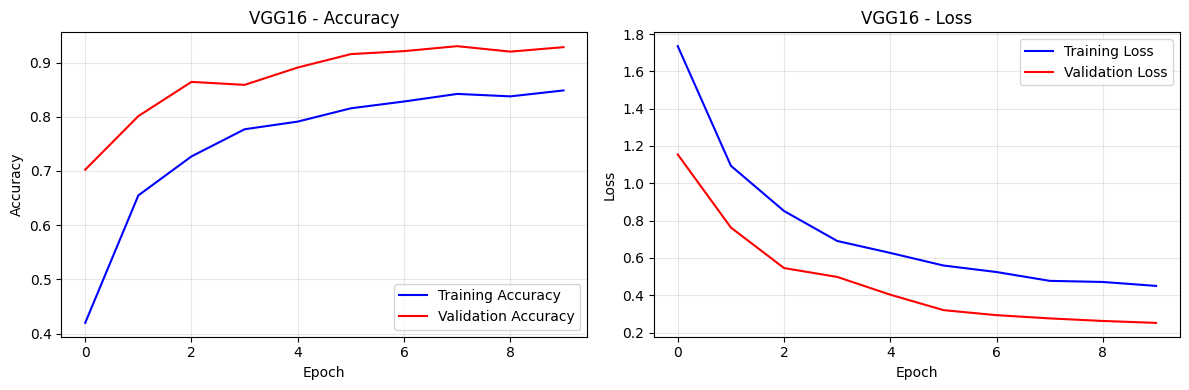


📈 VGG16 Results:
   Validation Accuracy: 0.9304
   Test Accuracy: 0.9332
   Test Loss: 0.2632

🧠 TRAINING: ResNet50
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
📊 Model Parameters: 23,851,403

🚀 Training ResNet50...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1390 - loss: 2.4301

195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.1391 - loss: 2.4296 - val_accuracy: 0.1685 - val_loss: 2.2172 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1790 - loss: 2.2395

195/195 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.1791 - loss: 2.2394 - val_accuracy: 0.2372 - val_loss: 2.1489 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.1977 - loss: 2.1829 - val_accuracy: 0.2207 - val_loss: 2.0872 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2320 - loss: 2.1100

195/195 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.2319 - loss: 2.1101 - val_accuracy: 0.2711 - val_loss: 2.0279 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2203 - loss: 2.1102

195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.2203 - loss: 2.1102 - val_accuracy: 0.2885 - val_loss: 2.0096 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.2306 - loss: 2.0740 - val_accuracy: 0.2729 - val_loss: 2.0027 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2288 - loss: 2.0647

195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.2289 - loss: 2.0647 - val_accuracy: 0.3443 - val_loss: 1.9820 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.2489 - loss: 2.0421 - val_accuracy: 0.2720 - val_loss: 1.9572 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.2417 - loss: 2.0376 - val_accuracy: 0.3187 - val_loss: 1.9144 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.2580 - loss: 2.0150 - val_accuracy: 0.3022 - val_loss: 1.9223 - learning_rate: 0.0010
100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step


C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

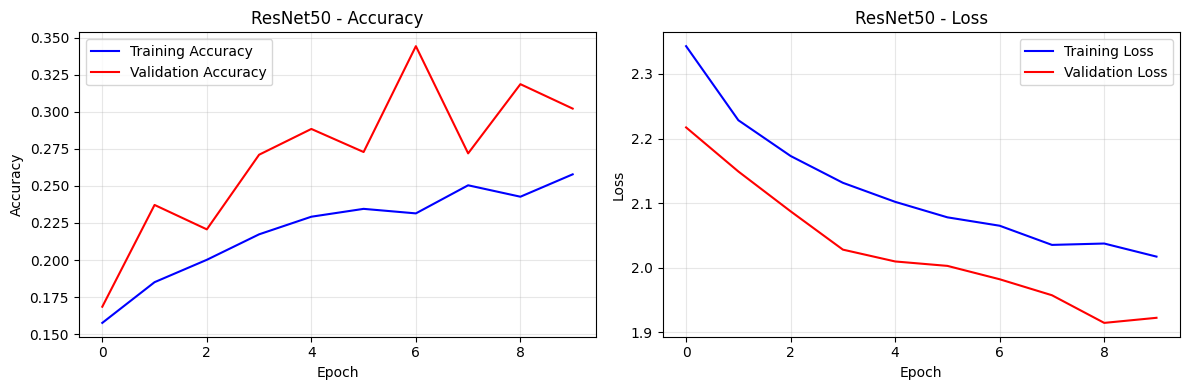


📈 ResNet50 Results:
   Validation Accuracy: 0.3443
   Test Accuracy: 0.3188
   Test Loss: 1.9833

🧠 TRAINING: MobileNetV2
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
📊 Model Parameters: 2,423,371

🚀 Training MobileNetV2...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.6636 - loss: 1.0223

195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 486ms/step - accuracy: 0.6644 - loss: 1.0199 - val_accuracy: 0.9469 - val_loss: 0.1531 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9350 - loss: 0.1991

195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 540ms/step - accuracy: 0.9350 - loss: 0.1990 - val_accuracy: 0.9753 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.9518 - loss: 0.1388

195/195 ━━━━━━━━━━━━━━━━━━━━ 102s 521ms/step - accuracy: 0.9518 - loss: 0.1387 - val_accuracy: 0.9817 - val_loss: 0.0580 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 0.9614 - loss: 0.1062

195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 496ms/step - accuracy: 0.9614 - loss: 0.1062 - val_accuracy: 0.9826 - val_loss: 0.0563 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 486ms/step - accuracy: 0.9708 - loss: 0.0890 - val_accuracy: 0.9799 - val_loss: 0.0504 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 92s 471ms/step - accuracy: 0.9742 - loss: 0.0741 - val_accuracy: 0.9817 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9768 - loss: 0.0742

195/195 ━━━━━━━━━━━━━━━━━━━━ 89s 454ms/step - accuracy: 0.9768 - loss: 0.0742 - val_accuracy: 0.9844 - val_loss: 0.0367 - learning_rate: 0.0010
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 436ms/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.9753 - val_loss: 0.0688 - learning_rate: 0.0010
Epoch 9/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 90s 464ms/step - accuracy: 0.9681 - loss: 0.0783 - val_accuracy: 0.9808 - val_loss: 0.0535 - learning_rate: 0.0010
Epoch 10/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 91s 464ms/step - accuracy: 0.9744 - loss: 0.0729 - val_accuracy: 0.9817 - val_loss: 0.0489 - learning_rate: 0.0010
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 260ms/step


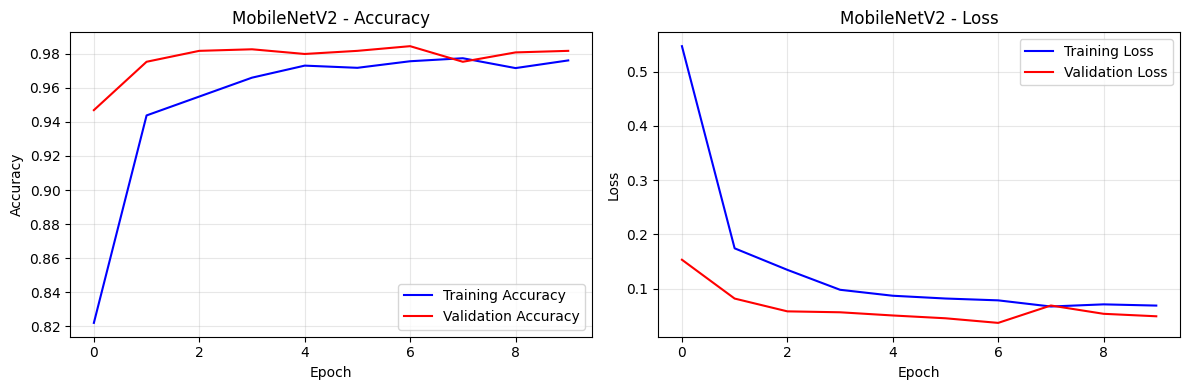


📈 MobileNetV2 Results:
   Validation Accuracy: 0.9844
   Test Accuracy: 0.9934
   Test Loss: 0.0199

🧠 TRAINING: EfficientNetB0
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
📊 Model Parameters: 4,214,958

🚀 Training EfficientNetB0...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.1544 - loss: 2.3470

195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 634ms/step - accuracy: 0.1544 - loss: 2.3470 - val_accuracy: 0.1712 - val_loss: 2.3118 - learning_rate: 0.0010
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 563ms/step - accuracy: 0.1643 - loss: 2.3197 - val_accuracy: 0.1712 - val_loss: 2.3144 - learning_rate: 0.0010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.1799 - loss: 2.3090 - val_accuracy: 0.1712 - val_loss: 2.3159 - learning_rate: 0.0010
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 564ms/step - accuracy: 0.1716 - loss: 2.3037 - val_accuracy: 0.1712 - val_loss: 2.3099 - learning_rate: 0.0010
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 109s 560ms/step - accuracy: 0.1794 - loss: 2.3046 - val_accuracy: 0.1712 - val_loss: 2.3114 - learning_rate: 0.0010
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 110s 565ms/step - accuracy: 0.1724 - loss: 2.3080 - val_accuracy: 0.1712 - val_loss: 2.3153 - learning_rate: 0.0010
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 111s 570ms/step - accuracy: 0.1744 

C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\aswin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

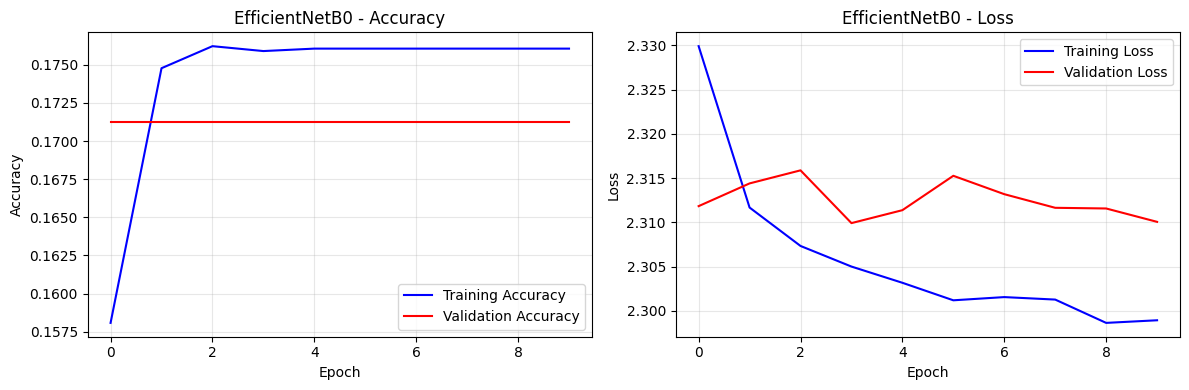


📈 EfficientNetB0 Results:
   Validation Accuracy: 0.1712
   Test Accuracy: 0.1632
   Test Loss: 2.3065

🏆 FINAL MODEL COMPARISON RESULTS
         Model  Validation Accuracy  Test Accuracy  Validation Loss  Test Loss  Precision (Macro)  Recall (Macro)  F1-Score (Macro)
   MobileNetV2               0.9844         0.9934           0.0367     0.0199             0.9945          0.9535            0.9677
         VGG16               0.9304         0.9332           0.2757     0.2632             0.8476          0.8488            0.8469
           CNN               0.9066         0.8974           0.3140     0.3287             0.8152          0.8160            0.8120
      ResNet50               0.3443         0.3188           1.9820     1.9833             0.2226          0.2818            0.2266
EfficientNetB0               0.1712         0.1632           2.3118     2.3065             0.0148          0.0909            0.0255

🏆 BEST MODEL: MobileNetV2
🎯 Test Accuracy: 0.9934
📊 Validation Accura

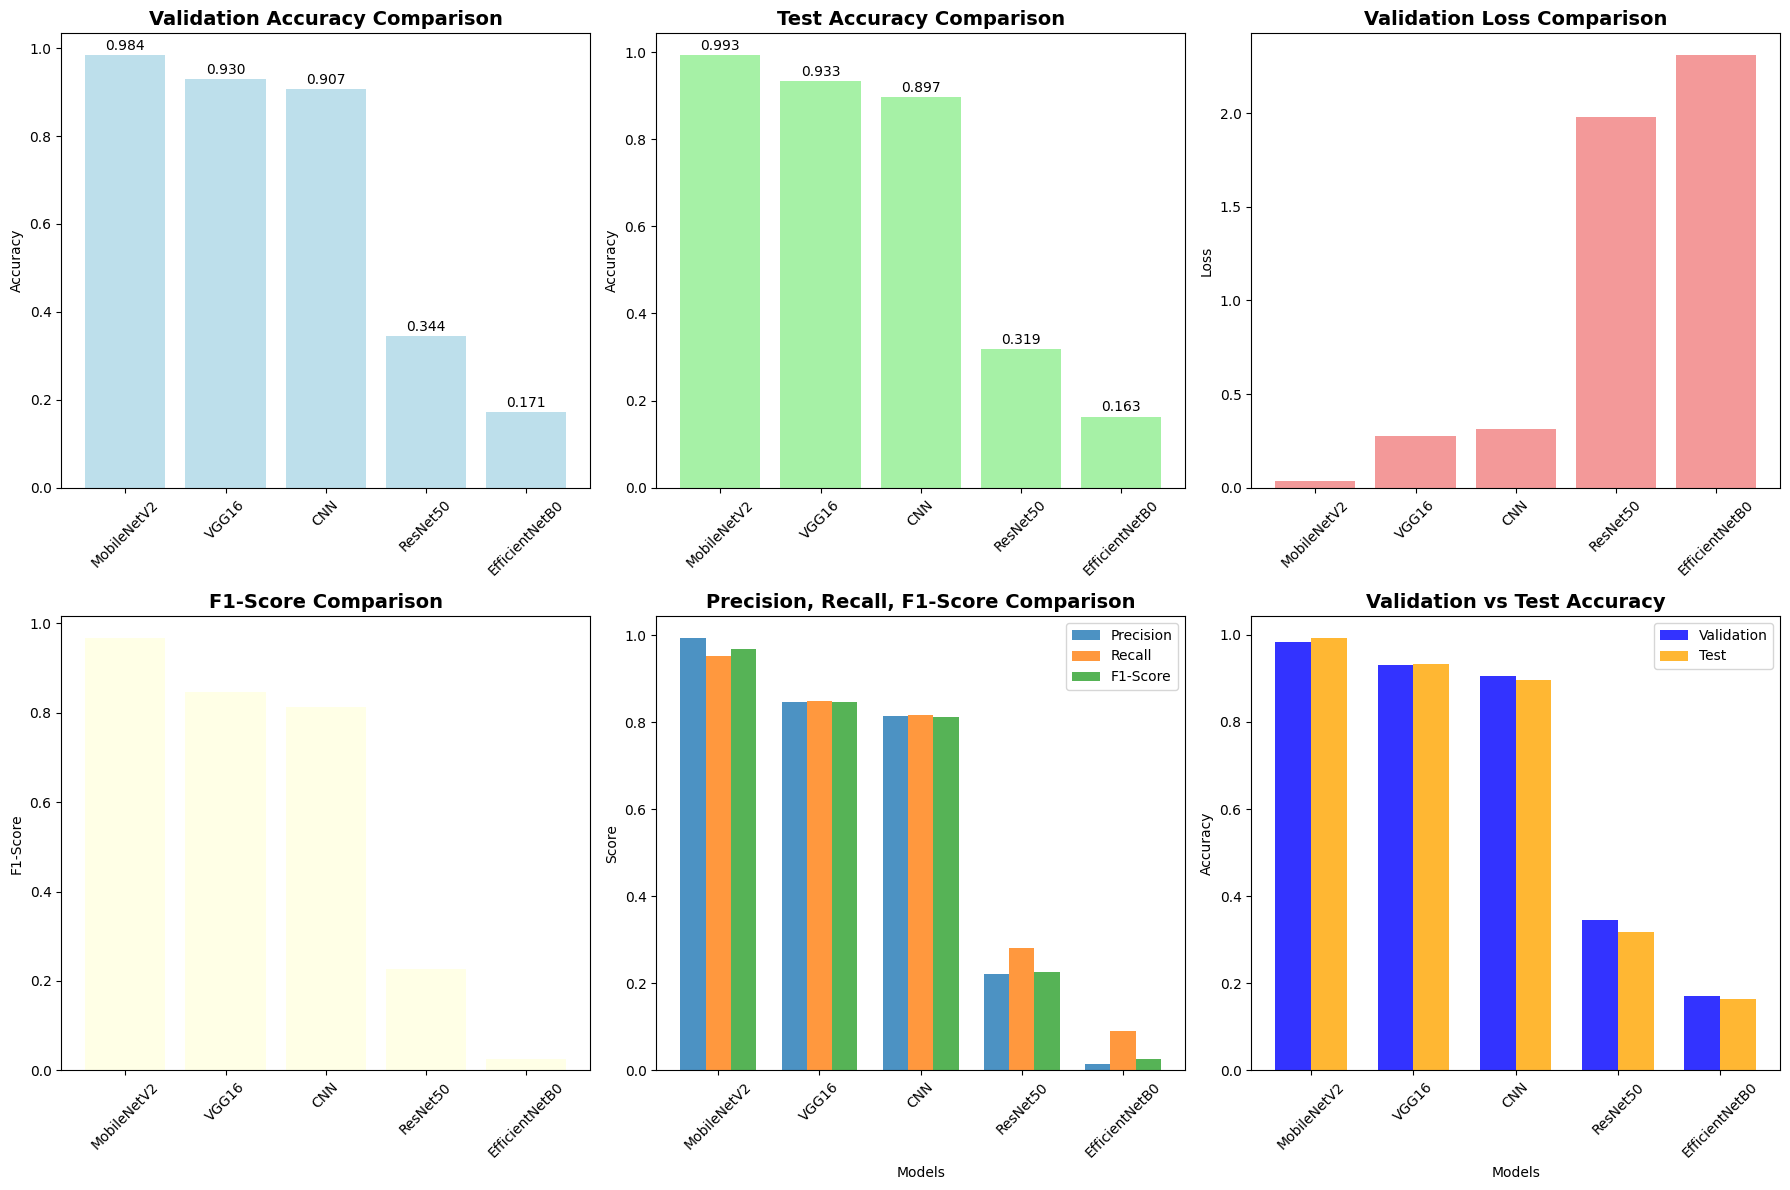

100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 240ms/step


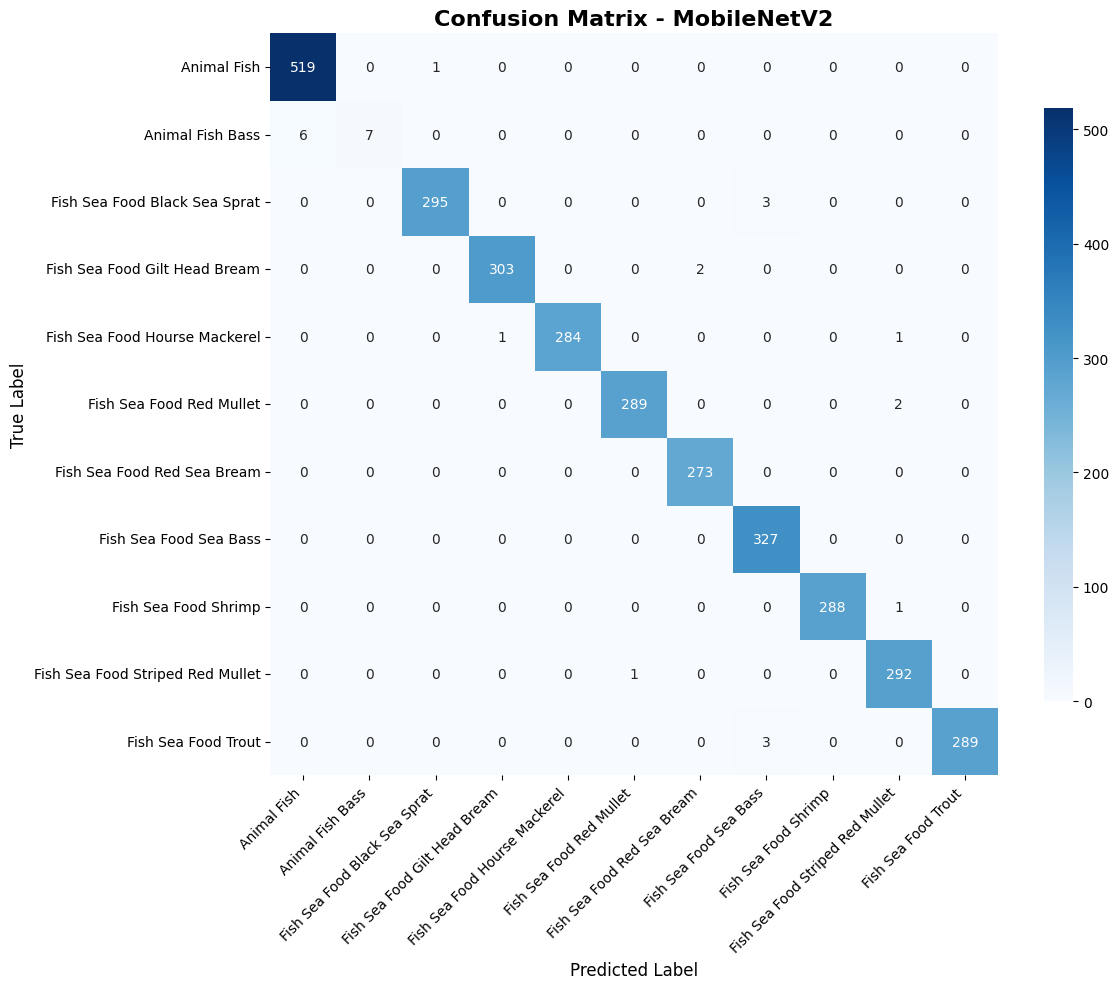


🎉 TRAINING COMPLETE!
🏆 Best Model: MobileNetV2
🎯 Test Accuracy: 0.9934
📊 Validation Accuracy: 0.9844

📁 Files saved in '/data/models/':
   ✅ best_model.h5 (best performing model)
   ✅ class_names.pkl (clean class names)
   ✅ original_class_names.pkl (original folder names)
   ✅ model_comparison.csv (comparison results)
   ✅ detailed_results.pkl (detailed results)
   ✅ Training history plots
   ✅ Model comparison plots
   ✅ Confusion matrix

🚀 Next Steps:
1. Download 'best_model.h5' and 'class_names.pkl'
2. Use these files in your Streamlit app
3. Deploy your fish classification app!

📦 Creating download package...
✅ Results packaged in: /data/fish_classification_results.zip

🏷️ FINAL CLASS MAPPING:
 1. 'animal fish' → 'Animal Fish'
 2. 'animal fish bass' → 'Animal Fish Bass'
 3. 'fish sea_food black_sea_sprat' → 'Fish Sea Food Black Sea Sprat'
 4. 'fish sea_food gilt_head_bream' → 'Fish Sea Food Gilt Head Bream'
 5. 'fish sea_food hourse_mackerel' → 'Fish Sea Food Hourse Mackerel'
 6.

In [18]:
#Creating Models

print("\n Creating and Training and Evaluating Models")

#1. CNN MODEL

def create_cnn_from_scratch():
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    return model

def create_transfer_learning_model(base_model_name, input_shape=(224, 224, 3)):
    base_models = {
        'VGG16': VGG16,
        'ResNet50': ResNet50,
        'MobileNetV2': MobileNetV2,
        'EfficientNetB0': EfficientNetB0
    }
    
    base_model = base_models[base_model_name](
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    base_model.trainable = False
    
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    return model

#Training Models 

def train_model(model, model_name, epochs=EPOCHS):
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7),
        ModelCheckpoint(
            f'/data/models/{model_name}_best.h5',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max'
        )
    ]
    
    print(f"\n🚀 Training {model_name}...")
    print("="*50)
    
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks,
        verbose=1
    )
    
    return history

#Compare Models

def evaluate_model(model, model_name, history):
    
    # Evaluate on validation and test data
    val_loss, val_accuracy = model.evaluate(validation_generator, verbose=0)
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
    
    # Get predictions on test data
    test_generator.reset()
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    
    # Classification report
    report = classification_report(
        true_classes, 
        predicted_classes, 
        target_names=CLEAN_CLASS_NAMES,
        output_dict=True
    )
    
    return {
        'model_name': model_name,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'test_accuracy': test_accuracy,
        'test_loss': test_loss,
        'classification_report': report,
        'history': history.history
    }

def plot_training_history(history, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax1.set_title(f'{model_name} - Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Loss
    ax2.plot(history.history['loss'], label='Training Loss', color='blue')
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax2.set_title(f'{model_name} - Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'/data/models/{model_name}_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

#MODEL TRAINING LOOP
print("\n🚀 Starting Model Training...")
print("="*60)

# Models to train
models_to_train = [
    ('CNN', create_cnn_from_scratch),
    ('VGG16', lambda: create_transfer_learning_model('VGG16')),
    ('ResNet50', lambda: create_transfer_learning_model('ResNet50')),
    ('MobileNetV2', lambda: create_transfer_learning_model('MobileNetV2')),
    ('EfficientNetB0', lambda: create_transfer_learning_model('EfficientNetB0'))
]

# Store results
results = []
trained_models = {}

# Train all models
for model_name, model_func in models_to_train:
    print(f"\n{'='*60}")
    print(f"🧠 TRAINING: {model_name}")
    print(f"{'='*60}")
    
    # Create model
    model = model_func()
    print(f"📊 Model Parameters: {model.count_params():,}")
    
    # Train model
    history = train_model(model, model_name)
    
    # Evaluate model
    result = evaluate_model(model, model_name, history)
    results.append(result)
    trained_models[model_name] = model
    
    # Plot training history
    plot_training_history(history, model_name)
    
    # Print results
    print(f"\n📈 {model_name} Results:")
    print(f"   Validation Accuracy: {result['val_accuracy']:.4f}")
    print(f"   Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"   Test Loss: {result['test_loss']:.4f}")

#Comparison

# Create comparison DataFrame
comparison_data = []
for result in results:
    comparison_data.append({
        'Model': result['model_name'],
        'Validation Accuracy': result['val_accuracy'],
        'Test Accuracy': result['test_accuracy'],
        'Validation Loss': result['val_loss'],
        'Test Loss': result['test_loss'],
        'Precision (Macro)': result['classification_report']['macro avg']['precision'],
        'Recall (Macro)': result['classification_report']['macro avg']['recall'],
        'F1-Score (Macro)': result['classification_report']['macro avg']['f1-score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)

print("\n" + "="*80)
print("🏆 FINAL MODEL COMPARISON RESULTS")
print("="*80)
print(comparison_df.round(4).to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_test_accuracy = comparison_df.iloc[0]['Test Accuracy']
best_val_accuracy = comparison_df.iloc[0]['Validation Accuracy']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"🎯 Test Accuracy: {best_test_accuracy:.4f}")
print(f"📊 Validation Accuracy: {best_val_accuracy:.4f}")

# Save the best model
best_model.save('/data/models/best_model.h5')
print(f"\n✅ Best model saved as '/data/models/best_model.h5'")

# Save comparison results
comparison_df.to_csv('/data/models/model_comparison.csv', index=False)

# Save detailed results
with open('/data/models/detailed_results.pkl', 'wb') as f:
    pickle.dump(results, f)

# Model comparison plots
plt.figure(figsize=(18, 12))

# Validation Accuracy
plt.subplot(2, 3, 1)
bars = plt.bar(comparison_df['Model'], comparison_df['Validation Accuracy'], color='lightblue', alpha=0.8)
plt.title('Validation Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{comparison_df.iloc[i]["Validation Accuracy"]:.3f}', 
             ha='center', va='bottom', fontsize=10)

# Test Accuracy
plt.subplot(2, 3, 2)
bars = plt.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color='lightgreen', alpha=0.8)
plt.title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{comparison_df.iloc[i]["Test Accuracy"]:.3f}', 
             ha='center', va='bottom', fontsize=10)

# Validation Loss
plt.subplot(2, 3, 3)
bars = plt.bar(comparison_df['Model'], comparison_df['Validation Loss'], color='lightcoral', alpha=0.8)
plt.title('Validation Loss Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Loss')
plt.xticks(rotation=45)

# F1-Score
plt.subplot(2, 3, 4)
bars = plt.bar(comparison_df['Model'], comparison_df['F1-Score (Macro)'], color='lightyellow', alpha=0.8)
plt.title('F1-Score Comparison', fontsize=14, fontweight='bold')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

# Combined metrics
plt.subplot(2, 3, 5)
metrics = ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']
x = np.arange(len(comparison_df))
width = 0.25

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric.split(' ')[0], alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision, Recall, F1-Score Comparison', fontsize=14, fontweight='bold')
plt.xticks(x + width, comparison_df['Model'], rotation=45)
plt.legend()

# Accuracy comparison (Val vs Test)
plt.subplot(2, 3, 6)
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['Validation Accuracy'], width, label='Validation', alpha=0.8, color='blue')
plt.bar(x + width/2, comparison_df['Test Accuracy'], width, label='Test', alpha=0.8, color='orange')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy', fontsize=14, fontweight='bold')
plt.xticks(x, comparison_df['Model'], rotation=45)
plt.legend()

plt.tight_layout()
plt.savefig('/data/models/model_comparison_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate confusion matrix for best model

test_generator.reset()
predictions = best_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=CLEAN_CLASS_NAMES, yticklabels=CLEAN_CLASS_NAMES,
            cbar_kws={'shrink': 0.8})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/data/models/confusion_matrix_best_model.png', dpi=300, bbox_inches='tight')
plt.show()

#Downloading Results

print("\n" + "="*80)
print("🎉 TRAINING COMPLETE!")
print("="*80)
print(f"🏆 Best Model: {best_model_name}")
print(f"🎯 Test Accuracy: {best_test_accuracy:.4f}")
print(f"📊 Validation Accuracy: {best_val_accuracy:.4f}")

print(f"\n📁 Files saved in '/data/models/':")
print("   ✅ best_model.h5 (best performing model)")
print("   ✅ class_names.pkl (clean class names)")
print("   ✅ original_class_names.pkl (original folder names)")
print("   ✅ model_comparison.csv (comparison results)")
print("   ✅ detailed_results.pkl (detailed results)")
print("   ✅ Training history plots")
print("   ✅ Model comparison plots")
print("   ✅ Confusion matrix")

print(f"\n🚀 Next Steps:")
print("1. Download 'best_model.h5' and 'class_names.pkl'")
print("2. Use these files in your Streamlit app")
print("3. Deploy your fish classification app!")

# Zip all results for easy download
print(f"\n📦 Creating download package...")
import shutil
shutil.make_archive('/data/fish_classification_results', 'zip', '/data/models')
print("✅ Results packaged in: /data/fish_classification_results.zip")

# Show final class mapping
print(f"\n🏷️ FINAL CLASS MAPPING:")
for i, (orig, clean) in enumerate(zip(CLASS_NAMES, CLEAN_CLASS_NAMES)):
    print(f"{i+1:2d}. '{orig}' → '{clean}'")


print(f"\n🎊 Fish Classification Project Complete! 🐟")